In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [3]:
from matplotlib.colors import ListedColormap

In [4]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df['species']=df['target'].apply(lambda x:iris.target_names[x])

In [5]:
print("--------Dataset info--------")
print(df.info())
print("--------first 5 rows----------")
print(df.head())
print("--------class distribution---------")
print(df['species'].value_counts())

--------Dataset info--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
--------first 5 rows----------
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5            

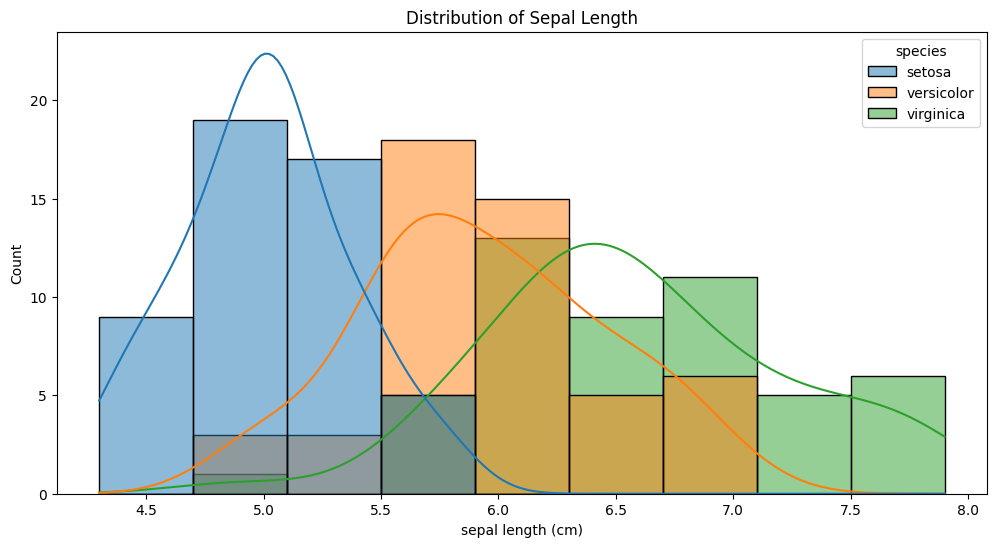

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(df,x="sepal length (cm)",hue="species",kde=True)
plt.title("Distribution of Sepal Length")
plt.show()

<Figure size 1200x600 with 0 Axes>

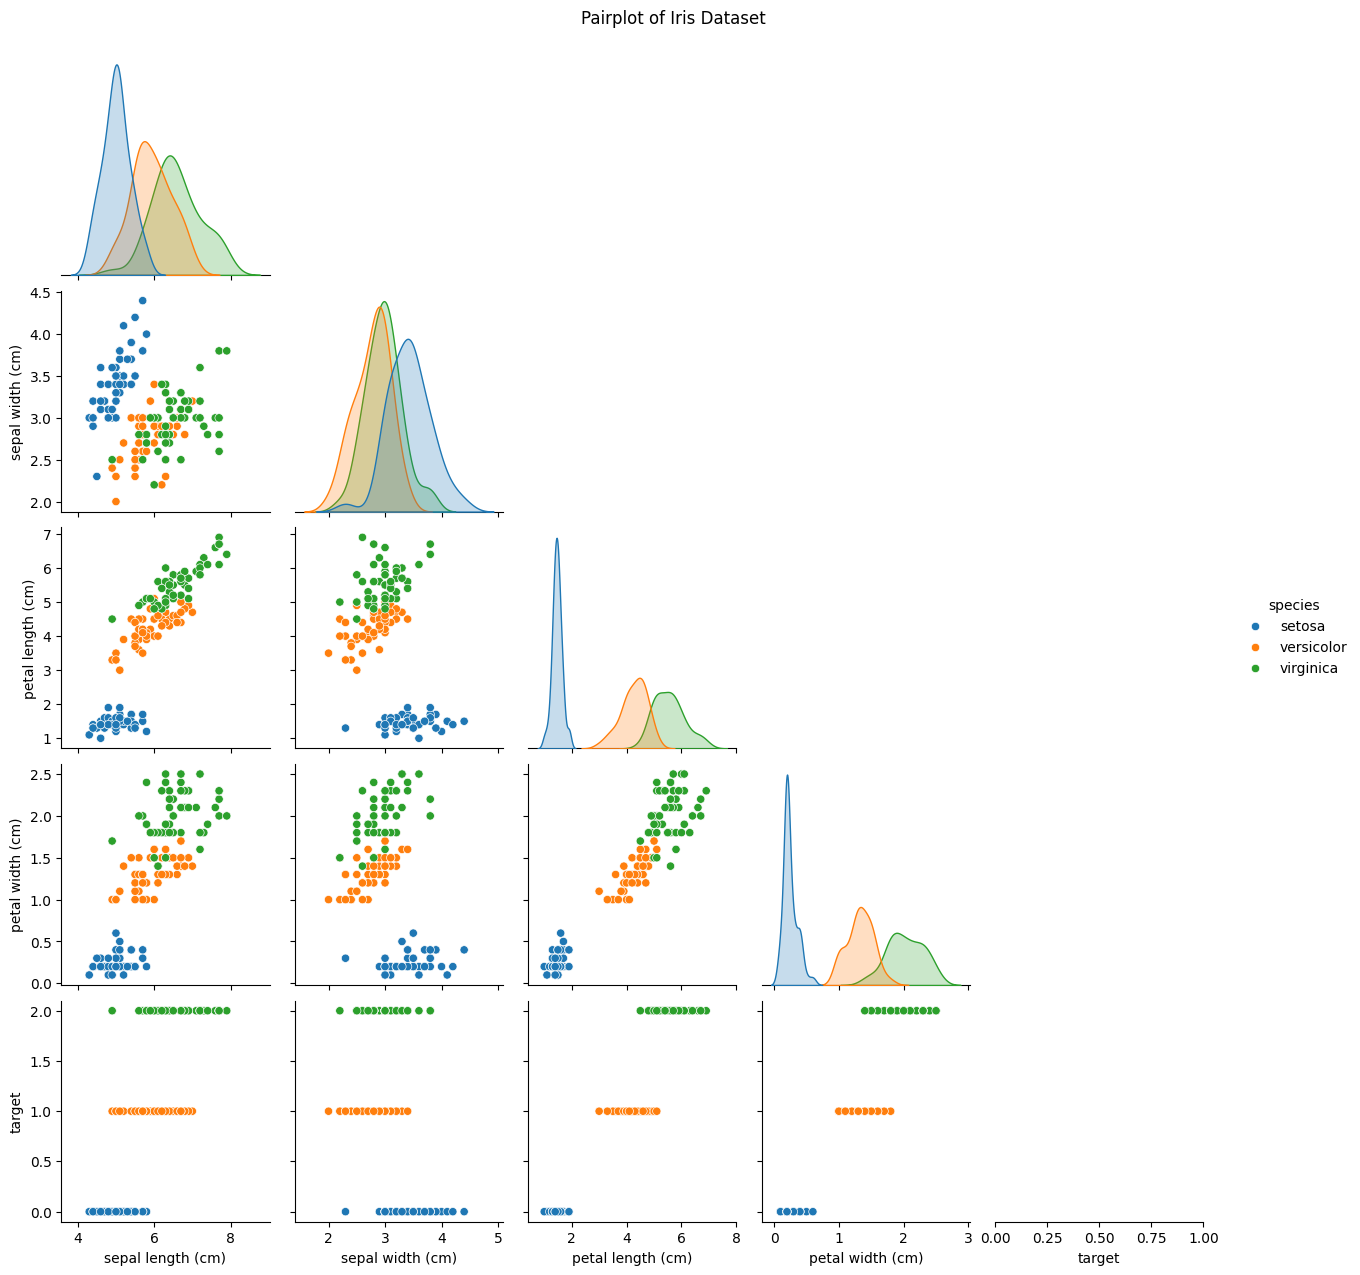

In [7]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue="species",corner=True)
plt.suptitle("Pairplot of Iris Dataset",y=1.02)
plt.show()

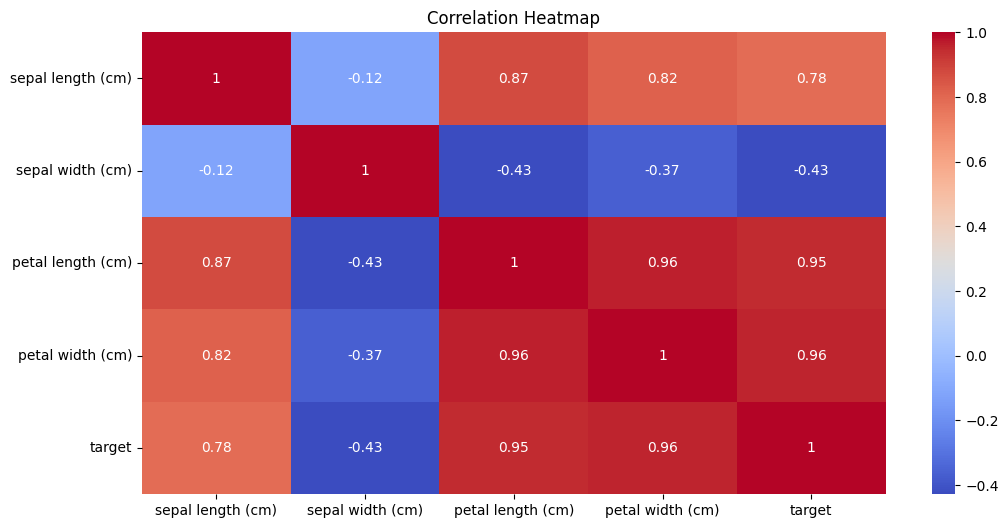

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
X=df[iris.feature_names]
y=df['target']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [12]:
y_pred=model.predict(X_test)

In [13]:
print("Accuracy Score-")
print(accuracy_score(y_test,y_pred))

Accuracy Score-
0.9777777777777777


In [14]:
print("Confusion Matrix-")
print(confusion_matrix(y_test,y_pred))


Confusion Matrix-
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


In [15]:
print("--------Classification Report--------")
print(classification_report(y_test,y_pred))

--------Classification Report--------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



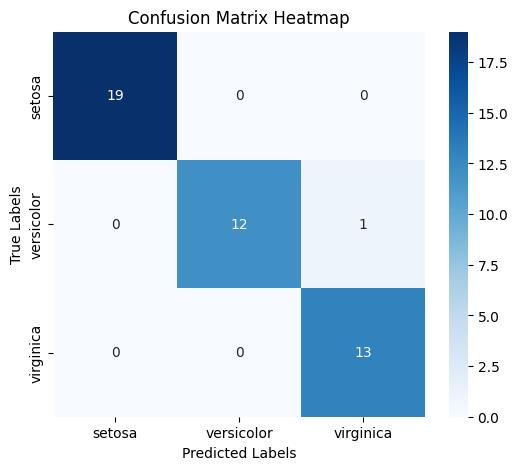

In [16]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues",xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

FOR OUR UNDERSTANDING ⏬

In [17]:
X_vis=df[['sepal length (cm)','sepal width (cm)']].values
y_vis=df['target'].values

In [18]:
model_vis=GaussianNB()
model_vis.fit(X_vis,y_vis)

GaussianNB()

In [19]:
x_min,x_max= X_vis[:,0].min()-1,X_vis[:,0].max()+1
y_min,y_max= X_vis[:,1].min()-1,X_vis[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

In [20]:
Z=model_vis.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

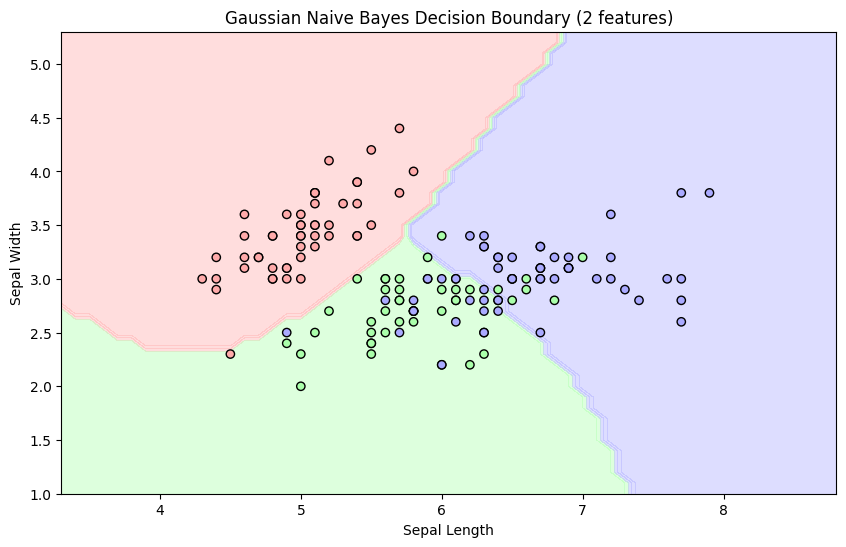

In [21]:
plt.figure(figsize=(10,6))
colors=ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
plt.contourf(xx,yy,Z,alpha=0.4,cmap=colors)
scatter = plt.scatter(X_vis[:,0],X_vis[:,1],c=y_vis,cmap=colors,edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Gaussian Naive Bayes Decision Boundary (2 features)")
plt.show()